In [127]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [128]:
# Read file

df = pd.read_excel('C:\\Users\\jorge\\Documents\\GitHub\\badly-structured-sales-data\\1.-Badly-Structured-Sales-Data-1.xlsx')

In [188]:
df.head()

,Segment,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total,Corporate,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Corporate Total,Home Office,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Home Office Total
0,Ship Mode>>,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN,First Class,Same Day,Second Class,Standard Class,NaN
1,Order ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-2011-100293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.056,91.056
3,CA-2011-100706,NaN,NaN,129.44,NaN,129.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA-2011-100895,NaN,NaN,NaN,605.47,605.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Row and column count

df.shape

(825, 16)

In [132]:
# Find columns with unnamed string

filt_contains_unnamed = df.columns.str.contains('Unnamed')

# Replace columns with string 'Unnamed'

col_ind = 0

new_cols = []

for i in df.columns.str.contains('Unnamed'):
    if i == True:
        new_cols.append(df.iloc[0, col_ind])
    else:
        new_cols.append(df.columns[col_ind])
    col_ind += 1

df.columns = new_cols

print(df.columns)

Index(['Segment>>', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


In [133]:
# Remove special characters from column names

df.columns = df.columns.str.replace('>', '')

# df.columns = df.columns.str.replace('[>, @, #]', '')

print(df.columns)

Index(['Segment', 'Consumer', 'Same Day', 'Second Class', 'Standard Class',
       'Consumer Total', 'Corporate', 'Same Day', 'Second Class',
       'Standard Class', 'Corporate Total', 'Home Office', 'Same Day',
       'Second Class', 'Standard Class', 'Home Office Total'],
      dtype='object')


In [137]:
# Some column names are located in first row

df.iloc[0]

Segment                 Ship Mode>>
Consumer                First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Consumer Total                  NaN
Corporate               First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Corporate Total                 NaN
Home Office             First Class
Same Day                   Same Day
Second Class           Second Class
Standard Class       Standard Class
Home Office Total               NaN
Name: 0, dtype: object

In [ ]:
# Rename columns - Option 1 --------------------------------------------

# column_indices = [*range(1, 5)]
# new_names = ['Consumer First Class', 'Consumer Same Day', 'Consumer Second Class', 'Consumer Standard Class']
# old_names = df.columns[column_indices]
# df.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [ ]:
# Rename columns - Option 2 --------------------------------------------

# cols_consumer = [i for i in df.columns[1:5]]
# num = 1

# for i in cols_consumer:
#     test = ' '.join(('Consumer', i))
#     df.rename(columns={df.columns[num]: test}, inplace= True)
#     print(df.columns[num])
#     num += 1

In [225]:
# Rename columns - Option 3 -------------------------------------------

df.columns = ['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Corporate Same Day', 'Corporate Second Class',
       'Corporate Standard Class', 'Corporate Total', 'Home Office',
       'Home Office Same Day', 'Home Office Second Class', 'Home Office Standard Class',
       'Home Office Total']

df.columns

Index(['Segment', 'Consumer First Class', 'Consumer Same Day',
       'Consumer Second Class', 'Consumer Standard Class', 'Consumer Total',
       'Corporate', 'Corporate Same Day', 'Corporate Second Class',
       'Corporate Standard Class', 'Corporate Total', 'Home Office',
       'Home Office Same Day', 'Home Office Second Class',
       'Home Office Standard Class', 'Home Office Total'],
      dtype='object')

<AxesSubplot:>

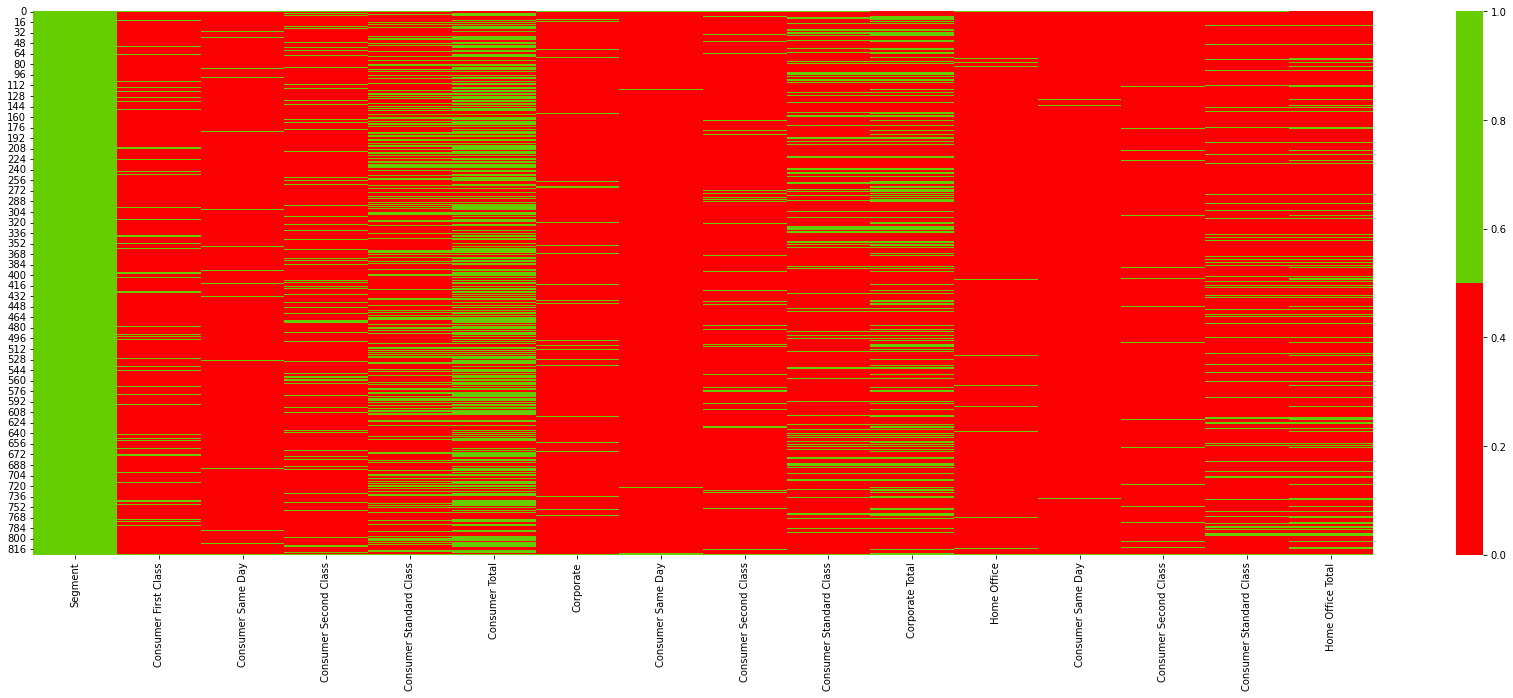

In [189]:
# View empty and non-empty values

nonempty_cells = df.notnull()

plt.subplots(figsize=(30,10))

sns.heatmap(nonempty_cells, cmap=sns.color_palette(['#fa0000', '#66cd00']))

In [195]:
df.iloc[:, 0:6].isnull()

,Segment,Consumer First Class,Consumer Same Day,Consumer Second Class,Consumer Standard Class,Consumer Total
0,False,False,False,False,False,True
1,False,True,True,True,True,True
2,False,True,True,True,True,True
3,False,True,True,False,True,False
4,False,True,True,True,False,False
...,...,...,...,...,...,...
820,False,True,True,True,True,True
821,False,True,True,False,True,False
822,False,True,True,True,True,True
823,False,True,True,True,False,False
